In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import pickle
# Plotting libraries
!pip install gcsfs
!pip install vaex
!pip install scikit-learn numpy
!pip install matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import time
import tensorflow as tf
# Sklearn libraries
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
# Filter warnings
warnings.filterwarnings('ignore') #filter warnings
# Show plots inline
%matplotlib inline
!pip install -U klib
import klib
!pip install matplotlib==3.1.3
!pip install klib
!pip install lazypredict

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import klib as kl 
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report




Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached vaex-4.17.0-py3-none-any.whl (4.8 kB)
  Using cached vaex-core-4.17.1.tar.gz (2.5 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached vaex_astro-0.9.3-py3-none-any.whl (20 kB)
  Using cached vaex_hdf5-0.14.1-py3-none-any.whl (16 kB)
  Using cached vaex_viz-0.5.4-py3-none-any.whl (19 kB)
  Using cached vaex_server-0.9.0-py3-none-any.whl (23 kB)
  Using cached vaex_jupyter-0.8.2-py3-none-any.whl (43 kB)
  Using cached vaex_ml-0.18.3-py3-none-any.whl (58 kB)
  Using cached aplus-0.11.0-py3-none-any.whl
  Using cached progressbar2

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [191 lines of output]
  <string>:4: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-311
  creating build\lib.win-amd64-cpython-311\vaex
  copying vaex\agg.py -> build\lib.win-amd64-cpython-311\vaex
  copying vaex\array_types.py -> build\lib.win-amd64-cpython-311\vaex
  copying vaex\asyncio.py -> build\lib.win-amd64-cpython-311\vaex
  copying vaex\benchmark.py -> build\lib.win-amd64-cpython-311\vaex
  copying vaex\cache.py -> build\lib.win-amd64-cpython-311\vaex
  copying vaex\column.py -> build\lib.win-amd64-cpython-311\vaex
  copying vaex\config.py -> build\lib.win-amd64-cpython-311\vaex
  copying vaex\convert.py -> build\lib.win-amd64-cpython-311\vaex
  copying vaex\cpu.py -> build\lib.win-amd64-cpyt

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.1.3.tar.gz (40.9 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  ERROR: Error [WinError 225] Operation did not complete successfully because the file contains a virus or potentially unwanted software while executing command python setup.py egg_info
ERROR: Could not install packages due to an OSError: [WinError 225] Operation did not complete successfully because the file contains a virus or potentially unwanted software



Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
df = pd.read_csv(r"D:\DATASET\CICIoT2023\1.csv")

In [3]:
df.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,53.46,5.94,63.36,1.145800,1.145800,0.0,0.0,1.0,0.0,...,0.040218,54.06,8.309402e+07,9.5,10.393232,0.057331,0.054789,0.03,141.55,DDoS-SYN_Flood
1,0.000000,54.00,6.00,64.00,1.027823,1.027823,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.307159e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-TCP_Flood
2,2.204616,93.96,6.00,64.00,0.671213,0.671213,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.336561e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SynonymousIP_Flood
3,0.053618,12497.00,17.00,64.00,47647.897124,47647.897124,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.310693e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
4,0.000000,0.00,1.00,64.00,0.667744,0.667744,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.314933e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218805 entries, 0 to 218804
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    218805 non-null  float64
 1   Header_Length    218805 non-null  float64
 2   Protocol Type    218805 non-null  float64
 3   Duration         218805 non-null  float64
 4   Rate             218805 non-null  float64
 5   Srate            218805 non-null  float64
 6   Drate            218805 non-null  float64
 7   fin_flag_number  218805 non-null  float64
 8   syn_flag_number  218805 non-null  float64
 9   rst_flag_number  218805 non-null  float64
 10  psh_flag_number  218805 non-null  float64
 11  ack_flag_number  218805 non-null  float64
 12  ece_flag_number  218805 non-null  float64
 13  cwr_flag_number  218805 non-null  float64
 14  ack_count        218805 non-null  float64
 15  syn_count        218805 non-null  float64
 16  fin_count        218805 non-null  floa

In [5]:
import pandas as pd

# Assuming you have loaded your dataset into the 'df' dataframe
num_samples = df.shape[0]

print("Number of samples in the dataset:", num_samples)


Number of samples in the dataset: 218805


In [6]:
# Count the occurrences of each category in the 'Attack_type' column
class_counts = df['label'].value_counts()

# Display the number of samples in each class
print(class_counts)

DDoS-ICMP_Flood            33529
DDoS-UDP_Flood             25343
DDoS-TCP_Flood             20964
DDoS-PSHACK_Flood          19373
DDoS-SYN_Flood             19235
DDoS-RSTFINFlood           19032
DDoS-SynonymousIP_Flood    16798
DoS-UDP_Flood              15500
DoS-TCP_Flood              12326
DoS-SYN_Flood               9314
BenignTraffic               5200
Mirai-greeth_flood          4728
Mirai-udpplain              4308
Mirai-greip_flood           3606
DDoS-ICMP_Fragmentation     2132
MITM-ArpSpoofing            1432
DDoS-UDP_Fragmentation      1392
DDoS-ACK_Fragmentation      1384
DNS_Spoofing                 827
Recon-HostDiscovery          652
Recon-OSScan                 425
Recon-PortScan               399
DoS-HTTP_Flood               347
VulnerabilityScan            143
DDoS-HTTP_Flood              127
DDoS-SlowLoris               100
DictionaryBruteForce          57
BrowserHijacking              30
SqlInjection                  27
CommandInjection              26
Backdoor_M

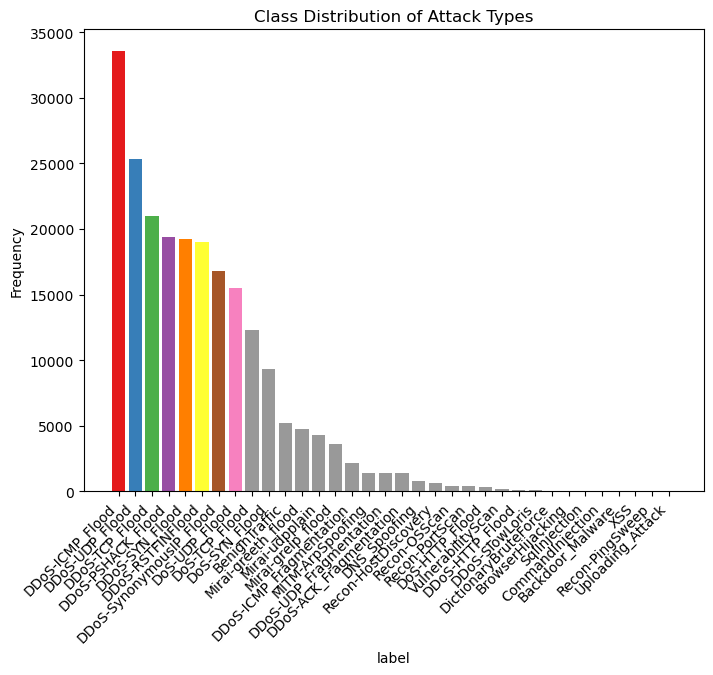

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded your dataset into the 'df' dataframe and converted 'Attack_type' to a category
df['label'] = df['label'].astype('category')

# Count the occurrences of each category in the 'Attack_type' column
class_counts = df['label'].value_counts()

# Define a colormap for the bars
colors = plt.cm.Set1(range(len(class_counts)))

# Plot the class distribution as a bar plot with different colors for each bar
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values, color=colors)
plt.xlabel('label')
plt.ylabel('Frequency')
plt.title('Class Distribution of Attack Types')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better visibility
plt.show()


In [8]:
values_to_drop = ['Backdoor_Malware', 'BrowserHijacking', 'CommandInjection',
                         'DNS_Spoofing', 'DictionaryBruteForce', 'MITM-ArpSpoofing', 'Mirai-greeth_flood',
                         'Mirai-greip_flood', 'Mirai-udpplain', 'Recon-HostDiscovery', 'Recon-OSScan',
                         'Recon-PingSweep', 'Recon-PortScan', 'SqlInjection', 'Uploading_Attack',
                         'VulnerabilityScan', 'XSS']
mask = df['label'].isin(values_to_drop)
df.drop(index=df[mask].index, inplace=True)


# Group the remaining attack types as 'ddos'
attack_types_ddos = ['DDoS-ACK_Fragmentation', 'DDoS-HTTP_Flood', 'DDoS-ICMP_Flood', 'DDoS-ICMP_Fragmentation',
                     'DDoS-PSHACK_Flood', 'DDoS-RSTFINFlood', 'DDoS-SYN_Flood', 'DDoS-SlowLoris', 'DDoS-SynonymousIP_Flood',
                     'DDoS-TCP_Flood', 'DDoS-UDP_Flood', 'DDoS-UDP_Fragmentation', 'DoS-HTTP_Flood', 'DoS-SYN_Flood',
                     'DoS-TCP_Flood', 'DoS-UDP_Flood']

df['label'] = df['label'].replace(attack_types_ddos, 'ddos')

In [9]:
df.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,53.46,5.94,63.36,1.145800,1.145800,0.0,0.0,1.0,0.0,...,0.040218,54.06,8.309402e+07,9.5,10.393232,0.057331,0.054789,0.03,141.55,ddos
1,0.000000,54.00,6.00,64.00,1.027823,1.027823,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.307159e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,ddos
2,2.204616,93.96,6.00,64.00,0.671213,0.671213,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.336561e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,ddos
3,0.053618,12497.00,17.00,64.00,47647.897124,47647.897124,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.310693e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,ddos
4,0.000000,0.00,1.00,64.00,0.667744,0.667744,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.314933e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,ddos


In [10]:
from sklearn.utils import shuffle
df = shuffle(df)

In [11]:
df.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
140720,0.000000,54.0,6.0,64.0,1.060485,1.060485,0.0,0.0,1.0,0.0,...,0.0,54.0,8.336105e+07,9.5,10.392305,0.0,0.0,0.0,141.55,ddos
139849,0.000000,0.0,1.0,64.0,29.347677,29.347677,0.0,0.0,0.0,0.0,...,0.0,42.0,8.312812e+07,9.5,9.165151,0.0,0.0,0.0,141.55,ddos
27720,0.000000,54.0,6.0,64.0,1.622748,1.622748,0.0,0.0,0.0,0.0,...,0.0,54.0,8.307237e+07,9.5,10.392305,0.0,0.0,0.0,141.55,ddos
4689,0.056008,25981.0,17.0,64.0,9531.924257,9531.924257,0.0,0.0,0.0,0.0,...,0.0,50.0,8.310180e+07,9.5,10.000000,0.0,0.0,0.0,141.55,ddos
17551,0.000000,0.0,1.0,64.0,24.241239,24.241239,0.0,0.0,0.0,0.0,...,0.0,42.0,8.314946e+07,9.5,9.165151,0.0,0.0,0.0,141.55,ddos


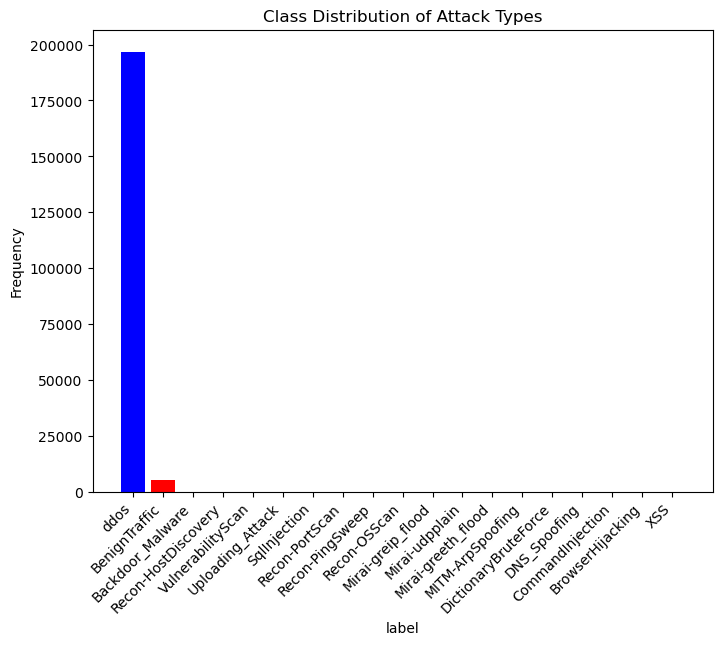

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded and cleaned your dataset into the 'df_cleaned' dataframe

# Count the occurrences of each category in the 'Attack_type' column
class_counts = df['label'].value_counts()

# Plot the class distribution as a bar plot
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values, color=['blue', 'red'])  # Use different colors for 'ddos' and other classes
plt.xlabel('label')
plt.ylabel('Frequency')
plt.title('Class Distribution of Attack Types')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better visibility
plt.show()


In [13]:
df.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
140720,0.000000,54.0,6.0,64.0,1.060485,1.060485,0.0,0.0,1.0,0.0,...,0.0,54.0,8.336105e+07,9.5,10.392305,0.0,0.0,0.0,141.55,ddos
139849,0.000000,0.0,1.0,64.0,29.347677,29.347677,0.0,0.0,0.0,0.0,...,0.0,42.0,8.312812e+07,9.5,9.165151,0.0,0.0,0.0,141.55,ddos
27720,0.000000,54.0,6.0,64.0,1.622748,1.622748,0.0,0.0,0.0,0.0,...,0.0,54.0,8.307237e+07,9.5,10.392305,0.0,0.0,0.0,141.55,ddos
4689,0.056008,25981.0,17.0,64.0,9531.924257,9531.924257,0.0,0.0,0.0,0.0,...,0.0,50.0,8.310180e+07,9.5,10.000000,0.0,0.0,0.0,141.55,ddos
17551,0.000000,0.0,1.0,64.0,24.241239,24.241239,0.0,0.0,0.0,0.0,...,0.0,42.0,8.314946e+07,9.5,9.165151,0.0,0.0,0.0,141.55,ddos


In [14]:
shuffled_df = df.sample(frac=1, random_state=42)


In [15]:
df.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
140720,0.000000,54.0,6.0,64.0,1.060485,1.060485,0.0,0.0,1.0,0.0,...,0.0,54.0,8.336105e+07,9.5,10.392305,0.0,0.0,0.0,141.55,ddos
139849,0.000000,0.0,1.0,64.0,29.347677,29.347677,0.0,0.0,0.0,0.0,...,0.0,42.0,8.312812e+07,9.5,9.165151,0.0,0.0,0.0,141.55,ddos
27720,0.000000,54.0,6.0,64.0,1.622748,1.622748,0.0,0.0,0.0,0.0,...,0.0,54.0,8.307237e+07,9.5,10.392305,0.0,0.0,0.0,141.55,ddos
4689,0.056008,25981.0,17.0,64.0,9531.924257,9531.924257,0.0,0.0,0.0,0.0,...,0.0,50.0,8.310180e+07,9.5,10.000000,0.0,0.0,0.0,141.55,ddos
17551,0.000000,0.0,1.0,64.0,24.241239,24.241239,0.0,0.0,0.0,0.0,...,0.0,42.0,8.314946e+07,9.5,9.165151,0.0,0.0,0.0,141.55,ddos


In [16]:
df['label'] = df['label'].astype('category')
df['label'].cat.categories

Index(['Backdoor_Malware', 'BenignTraffic', 'BrowserHijacking',
       'CommandInjection', 'ddos', 'DNS_Spoofing', 'DictionaryBruteForce',
       'MITM-ArpSpoofing', 'Mirai-greeth_flood', 'Mirai-greip_flood',
       'Mirai-udpplain', 'Recon-HostDiscovery', 'Recon-OSScan',
       'Recon-PingSweep', 'Recon-PortScan', 'SqlInjection', 'Uploading_Attack',
       'VulnerabilityScan', 'XSS'],
      dtype='object')

In [17]:
X = df.drop('label',axis=1)
y = df['label']

In [18]:
from sklearn.model_selection import train_test_split
X = df.drop(['label'], axis=1)
y = df.filter(['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train = X_train.dropna()
X_test = X_test.dropna()

In [21]:
X = df.drop('label',axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) 
from sklearn.preprocessing import StandardScaler
# Scaling the data
scaler = StandardScaler()
    
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# Perform one-hot encoding on the target variable
y_train_encoded = pd.get_dummies(y_train)
y_test_encoded = pd.get_dummies(y_test)

# Convert the encoded target variable to float
y_train_encoded = y_train_encoded.astype(float)
y_test_encoded = y_test_encoded.astype(float)


In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.python.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
import matplotlib.pyplot as plt
import time

learning_rate = 0.001

# Encode the target variable using label encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Calculate the number of classes
num_classes = len(label_encoder.classes_)

# Encode the target variable using one-hot encoding
y_train_encoded = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_encoded = to_categorical(y_test_encoded, num_classes=num_classes)

# Define the original model
original_model = Sequential()
original_model.add(Dense(64, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), bias_regularizer=regularizers.L2(1e-4), activity_regularizer=regularizers.L2(1e-5)))  # Adjust the input_dim to match the number of columns in your dataset
original_model.add(Dropout(0.5))
original_model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), bias_regularizer=regularizers.L2(1e-4), activity_regularizer=regularizers.L2(1e-5)))
original_model.add(Dropout(0.5))
original_model.add(Dense(num_classes, activation='softmax'))

# Compile the original model with the Adam optimizer and specific learning rate
optimizer = Adam(learning_rate=learning_rate)
original_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# Train the original model with early stopping
start_time = time.time()
original_model_history = original_model.fit(X_train, y_train_encoded, epochs=20, validation_data=(X_test, y_test_encoded), callbacks=[early_stopping])
end_time = time.time()

# Calculate the computational time
computational_time = end_time - start_time

# Print the learning rate and model accuracy for each epoch
for epoch in range(len(original_model_history.history['accuracy'])):
    print(f"Epoch {epoch+1}: Learning Rate = {learning_rate}, Accuracy = {original_model_history.history['accuracy'][epoch]:.4f}")

# Evaluate the original model
loss, accuracy = original_model.evaluate(X_test, y_test_encoded)
print(f'Original Model Test Loss: {loss:.4f}')
print(f'Original Model Test Accuracy: {accuracy:.4f}')

# Perturbation using Iterative FGSM
epsilon = 0.05  # Individual step size for each iteration
num_iterations = 10  # Number of iterations for iterative FGSM

perturbed_model = tf.keras.models.clone_model(original_model)
perturbed_model.set_weights(original_model.get_weights())

x_test_perturbed = np.copy(X_test).astype(np.float32)  # Convert to float32

perturbed_model_losses = []
perturbed_model_val_losses = []
perturbed_model_accuracies = []

# Create a new optimizer for the perturbed model
optimizer_perturbed = tf.keras.optimizers.SGD(learning_rate=learning_rate)

for _ in range(num_iterations):
    x_test_tensor = tf.convert_to_tensor(x_test_perturbed, dtype=tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(x_test_tensor)
        predictions = perturbed_model(x_test_tensor)
        loss = tf.keras.losses.CategoricalCrossentropy()(y_test_encoded, predictions)

    gradients = tape.gradient(loss, x_test_tensor)
    signed_gradients = tf.sign(gradients)
    x_test_perturbed = tf.add(x_test_perturbed, epsilon * signed_gradients)
    x_test_perturbed = np.clip(x_test_perturbed, 0, 1)

    # Compile the perturbed model for each iteration
    perturbed_model.compile(loss='categorical_crossentropy', optimizer=optimizer_perturbed, metrics=['accuracy'])

    # Train the perturbed model for one epoch with the perturbed data
    perturbed_model_history = perturbed_model.fit(X_train, y_train_encoded, epochs=1, validation_data=(X_test, y_test_encoded), callbacks=[early_stopping])

    # Append the training and validation losses and accuracies to the lists
    perturbed_model_losses.extend(perturbed_model_history.history['loss'])
    perturbed_model_val_losses.extend(perturbed_model_history.history['val_loss'])
    perturbed_model_accuracies.extend(perturbed_model_history.history['accuracy'])

# Plot the training and validation loss for the original model
plt.figure(figsize=(8, 6))
plt.plot(original_model_history.history['loss'], label='Training Loss')
plt.plot(original_model_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss - Original Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation loss for the perturbed model
plt.figure(figsize=(8, 6))
plt.plot(perturbed_model_losses, label='Training Loss')
plt.plot(perturbed_model_val_losses, label='Validation Loss')
plt.title('Training and Validation Loss - Perturbed Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predict classes for the test set using the original model
y_pred_original = np.argmax(original_model.predict(X_test), axis=1)
# Convert the predicted class indices back to original class labels
y_pred_original_labels = label_encoder.inverse_transform(y_pred_original)

# Generate classification report for the original model
classification_report_original = classification_report(y_test, y_pred_original_labels)
print("Classification Report - Original Model:")
print(classification_report_original)

# Calculate the MCC score for the original model
mcc_original = matthews_corrcoef(y_test, y_pred_original_labels)
print("Matthews Correlation Coefficient (MCC) - Original Model:", mcc_original)

# Calculate the prediction time for the original model
start_time = time.time()
y_pred_original = np.argmax(original_model.predict(X_test), axis=1)
end_time = time.time()
prediction_time_original = end_time - start_time

# Predict classes for the test set using the perturbed model
y_pred_perturbed = np.argmax(perturbed_model.predict(x_test_perturbed), axis=1)
# Convert the predicted class indices back to original class labels
y_pred_perturbed_labels = label_encoder.inverse_transform(y_pred_perturbed)

# Generate classification report for the perturbed model
classification_report_perturbed = classification_report(y_test, y_pred_perturbed_labels)
print("Classification Report - Perturbed Model:")
print(classification_report_perturbed)

# Calculate the MCC score for the perturbed model
mcc_perturbed = matthews_corrcoef(y_test, y_pred_perturbed_labels)
print("Matthews Correlation Coefficient (MCC) - Perturbed Model:", mcc_perturbed)

# Calculate the prediction time for the perturbed model
start_time = time.time()
y_pred_perturbed = np.argmax(perturbed_model.predict(x_test_perturbed), axis=1)
end_time = time.time()
prediction_time_perturbed = end_time - start_time

# Calculate the perturbed model accuracy and loss
perturbed_model_loss, perturbed_model_accuracy = perturbed_model.evaluate(X_test, y_test_encoded)
print(f'Perturbed Model Test Loss: {perturbed_model_loss:.4f}')
print(f'Perturbed Model Test Accuracy: {perturbed_model_accuracy:.4f}')

print("Prediction Time - Original Model:", prediction_time_original)
print("Prediction Time - Perturbed Model:", prediction_time_perturbed)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict classes for the test set using the original model
y_pred_original = np.argmax(original_model.predict(X_test), axis=1)
# Convert the predicted class indices back to original class labels
y_pred_original_labels = label_encoder.inverse_transform(y_pred_original)
# Convert the true class indices to original class labels
y_test_labels = label_encoder.inverse_transform(np.argmax(y_test_encoded, axis=1))

# Create a confusion matrix for the original model
confusion_matrix_original = confusion_matrix(y_test_labels, y_pred_original_labels)

# Normalize the confusion matrix to percentages
confusion_matrix_original = confusion_matrix_original.astype('float') / confusion_matrix_original.sum(axis=1)[:, np.newaxis]
confusion_matrix_original *= 100

# Plot the confusion matrix for the original model
class_names = label_encoder.classes_
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_original, annot=True, fmt='.1f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Original Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Predict classes for the test set using the perturbed model
y_pred_perturbed = np.argmax(perturbed_model.predict(x_test_perturbed), axis=1)
# Convert the predicted class indices back to original class labels
y_pred_perturbed_labels = label_encoder.inverse_transform(y_pred_perturbed)

# Create a confusion matrix for the perturbed model
confusion_matrix_perturbed = confusion_matrix(y_test_labels, y_pred_perturbed_labels)

# Normalize the confusion matrix to percentages
confusion_matrix_perturbed = confusion_matrix_perturbed.astype('float') / confusion_matrix_perturbed.sum(axis=1)[:, np.newaxis]
confusion_matrix_perturbed *= 100

# Plot the confusion matrix for the perturbed model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_perturbed, annot=True, fmt='.1f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Perturbed Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
import numpy as np
import umap
import matplotlib.pyplot as plt
from keras.models import Model  # Import the Model class from Keras

# Assuming you have the original_model_history object
# Extract the embeddings from the last hidden layer of the original model
get_last_hidden_layer = original_model.layers[-2].output
embedding_model = Model(inputs=original_model.input, outputs=get_last_hidden_layer)
embeddings = embedding_model.predict(X_test)

# Use UMAP to reduce the dimensionality of the embeddings to 2D
umap_embeddings = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean').fit_transform(embeddings)

# Plot UMAP embeddings with red and blue points
plt.figure(figsize=(10, 6))
plt.scatter(umap_embeddings[y_test_encoded[:, 0] == 0, 0], umap_embeddings[y_test_encoded[:, 0] == 0, 1], color='red', label='DDoS')
plt.scatter(umap_embeddings[y_test_encoded[:, 0] == 1, 0], umap_embeddings[y_test_encoded[:, 0] == 1, 1], color='blue', label='Normal')
plt.title('UMAP Projection of Original Model Embeddings')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend()
plt.show()


In [ ]:
import umap
import seaborn as sns

# Combine the original and perturbed data samples
combined_data = np.vstack((X_test, x_test_perturbed))
labels = np.hstack((y_test, y_test))

# Convert class labels to numerical values
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Reduce the data dimensionality using UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
umap_embeddings = reducer.fit_transform(combined_data)

# Create a DataFrame to store the UMAP embeddings and numerical labels
umap_df = pd.DataFrame(umap_embeddings, columns=['UMAP1', 'UMAP2'])
umap_df['Label'] = labels_encoded

# Map numerical labels back to class labels for visualization
umap_df['Label'] = umap_df['Label'].map({0: 'Normal', 1: 'DDOS'})

# Plot the UMAP visualization with red and blue points
plt.figure(figsize=(10, 8))
sns.scatterplot(data=umap_df, x='UMAP1', y='UMAP2', hue='Label', palette={'Normal': 'blue', 'DDOS': 'red'}, s=30, alpha=0.8)
plt.title('UMAP Visualization of Original vs Perturbed Data Samples')
plt.show()


In [ ]:




###################adversarial training to protect the perturbed model






In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Perform Adversarial Training with the perturbed data
adversarial_model = tf.keras.models.clone_model(original_model)
adversarial_model.set_weights(original_model.get_weights())

# Create a new optimizer for the adversarial model
optimizer_adversarial = tf.keras.optimizers.Adam(learning_rate=learning_rate)

perturbed_model_val_losses_adv = []

for _ in range(num_iterations):
    # Generate new adversarial data for training using FGSM
    x_train_perturbed = np.copy(X_train).astype(np.float32)
    for _ in range(num_iterations):
        x_train_tensor = tf.convert_to_tensor(x_train_perturbed, dtype=tf.float32)

        with tf.GradientTape() as tape:
            tape.watch(x_train_tensor)
            predictions = adversarial_model(x_train_tensor)
            loss = tf.keras.losses.CategoricalCrossentropy()(y_train_encoded, predictions)

        gradients = tape.gradient(loss, x_train_tensor)
        signed_gradients = tf.sign(gradients)
        x_train_perturbed = tf.add(x_train_perturbed, epsilon * signed_gradients)
        x_train_perturbed = np.clip(x_train_perturbed, 0, 1)

    # Compile the adversarial model for each iteration
    adversarial_model.compile(loss='categorical_crossentropy', optimizer=optimizer_adversarial, metrics=['accuracy'])

    # Train the adversarial model for one epoch with the perturbed data
    adversarial_model_history = adversarial_model.fit(x_train_perturbed, y_train_encoded, epochs=1, validation_data=(X_test, y_test_encoded), callbacks=[early_stopping])

    # Append the validation loss for the adversarial model to the list
    perturbed_model_val_losses_adv.extend(adversarial_model_history.history['val_loss'])

# Plot the training and validation loss for the adversarial model
plt.figure(figsize=(8, 6))
plt.plot(perturbed_model_losses, label='Original Model Training Loss')
plt.plot(perturbed_model_val_losses, label='Original Model Validation Loss')
plt.plot(perturbed_model_val_losses_adv, label='Adversarial Training Model Validation Loss')
plt.title('Training and Validation Loss - Adversarial Training Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predict classes for the test set using the perturbed model after adversarial training
y_pred_perturbed_adv = np.argmax(adversarial_model.predict(X_test), axis=1)
# Convert the predicted class indices back to original class labels
y_pred_perturbed_labels_adv = label_encoder.inverse_transform(y_pred_perturbed_adv)

# Generate classification report for the perturbed model after adversarial training
classification_report_perturbed_adv = classification_report(y_test, y_pred_perturbed_labels_adv)
print("Classification Report - Adversarial Training Model:")
print(classification_report_perturbed_adv)

# Generate confusion matrix for the perturbed model after adversarial training
cm_adv = confusion_matrix(y_test, y_pred_perturbed_labels_adv)
cm_percentage_adv = cm_adv.astype('float') / cm_adv.sum(axis=1)[:, np.newaxis] * 100.0

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage_adv, annot=True, fmt=".2f", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Adversarial Training Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
# Calculate the MCC score for the perturbed model after adversarial training
mcc_score_perturbed_adv = matthews_corrcoef(y_test, y_pred_perturbed_labels_adv)

# Print the MCC score
print(f'MCC Score - Adversarial Training Model: {mcc_score_perturbed_adv:.4f}')

In [ ]:
# Compute prediction time for the perturbed model after adversarial training
start_time_pred = time.time()
y_pred_perturbed_adv = np.argmax(adversarial_model.predict(X_test), axis=1)
end_time_pred = time.time()

# Convert the predicted class indices back to original class labels
y_pred_perturbed_labels_adv = label_encoder.inverse_transform(y_pred_perturbed_adv)

# Calculate the MCC score for the perturbed model after adversarial training
mcc_score_perturbed_adv = matthews_corrcoef(y_test, y_pred_perturbed_labels_adv)

# Print the MCC score
print(f'MCC Score - Adversarial Training Model: {mcc_score_perturbed_adv:.4f}')

# Compute and print the prediction time
prediction_time = end_time_pred - start_time_pred
print(f'Prediction Time - Adversarial Training Model: {prediction_time:.4f} seconds')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import umap

# Combine original and adversarial-protected samples for UMAP visualization
combined_data = np.vstack((X_test, x_train_perturbed))

# Apply UMAP transformation
umap_emb = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean').fit_transform(combined_data)

# Create separate UMAP embeddings for original and adversarial-protected samples
umap_emb_original = umap_emb[:len(X_test)]
umap_emb_adversarial = umap_emb[len(X_test):]

# Plot UMAP visualization
plt.figure(figsize=(10, 5))
plt.scatter(umap_emb_original[:, 0], umap_emb_original[:, 1], c='blue', label='Original Samples')
plt.scatter(umap_emb_adversarial[:, 0], umap_emb_adversarial[:, 1], c='red', label='Adversarial-Protected Samples')
plt.title('UMAP Visualization of Original vs. Adversarial-Protected Samples')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend()
plt.show()


In [ ]:











#time to protect the model using SAP







#!pip install tensorflow-model-optimization
import tensorflow_model_optimization as tfmot



In [ ]:


# Define the CNN model
model = Sequential()
model.add(tfmot.sparsity.keras.prune_low_magnitude(Dense(64, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), bias_regularizer=regularizers.L2(1e-4), activity_regularizer=regularizers.L2(1e-5))))
model.add(Dropout(0.5))
model.add(tfmot.sparsity.keras.prune_low_magnitude(Dense(32, activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), bias_regularizer=regularizers.L2(1e-4), activity_regularizer=regularizers.L2(1e-5))))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model with the Adam optimizer and specific learning rate
optimizer = Adam(learning_rate=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Apply SAP to the model
pruning_params = {
    'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.50, final_sparsity=0.80, begin_step=0, end_step=1000)
}

model = tfmot.sparsity.keras.prune_low_magnitude(model, **pruning_params)

# Compile the model after applying SAP
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Add the UpdatePruningStep and EarlyStopping callbacks
callbacks = [
    tfmot.sparsity.keras.UpdatePruningStep(),
    EarlyStopping(monitor='val_loss', patience=3, verbose=1)
]

# Train the model
start_time = time.time()
history = model.fit(X_train, y_train_encoded, epochs=20, validation_data=(X_test, y_test_encoded), callbacks=callbacks)
end_time = time.time()

# Calculate the computational time
computational_time = end_time - start_time

# Print the learning rate and model accuracy for each epoch
for epoch in range(len(history.history['loss'])):
    print(f"Epoch {epoch+1}: Learning Rate = {learning_rate}, Accuracy = {history.history['accuracy'][epoch]:.4f}")

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Print the computational time
print(f'Computational Time: {computational_time:.2f} seconds')

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_encoded, axis=1)

# Calculate the Matthews correlation coefficient (MCC)
mcc = matthews_corrcoef(y_test_classes, y_pred_classes)
print(f'Matthews Correlation Coefficient (MCC): {mcc:.4f}')

# Generate classification report
target_names = label_encoder.classes_
classification_rep = classification_report(y_test_classes, y_pred_classes, target_names=target_names)
print(classification_rep)


In [ ]:
# Plot the training loss and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Convert the one-hot encoded labels back to the original class labels
y_test_labels = label_encoder.inverse_transform(np.argmax(y_test_encoded, axis=1))
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Create the confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)

# Get the class names
class_names = label_encoder.classes_

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Normalize the confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Add labels to each cell
thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f'{cm[i, j]:.2f}', horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [ ]:
# Make predictions
start_time = time.time()
y_pred = model.predict(X_test)
end_time = time.time()

# Calculate the prediction time
prediction_time = end_time - start_time
print(f'Prediction Time: {prediction_time:.2f} seconds')

y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_encoded, axis=1)

# Calculate the Matthews correlation coefficient (MCC)
mcc = matthews_corrcoef(y_test_classes, y_pred_classes)
print(f'Matthews Correlation Coefficient (MCC): {mcc:.4f}')

# Generate classification report
target_names = label_encoder.classes_
classification_rep = classification_report(y_test_classes, y_pred_classes, target_names=target_names)
print(classification_rep)


In [ ]:
# Generate UMAP embeddings for the original and SAP-protected test samples
umap_model = umap.UMAP()
umap_embeddings_original = umap_model.fit_transform(X_test)
umap_embeddings_sap = umap_model.transform(X_test)

# Plot UMAP visualization for the original and SAP-protected samples
plt.figure(figsize=(12, 6))
plt.scatter(umap_embeddings_original[:, 0], umap_embeddings_original[:, 1], c='blue', alpha=0.5, label='Original Samples')
plt.scatter(umap_embeddings_sap[:, 0], umap_embeddings_sap[:, 1], c='green', alpha=0.5, marker='x', label='SAP Protected Samples')
plt.colorbar()
plt.legend()
plt.title('UMAP Visualization - Original vs. SAP Protected Samples')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

In [ ]:


#XAI for the protected model using IR





















In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
from tensorflow.keras import regularizers
import time

learning_rate = 0.001

# Encode the target variable using label encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Calculate the number of classes
num_classes = len(label_encoder.classes_)

# Encode the target variable using one-hot encoding
y_train_encoded = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_encoded = to_categorical(y_test_encoded, num_classes=num_classes)

# Add random padding to input data
max_length = X_train.shape[1]  # Maximum length of input samples
pad_length = 10  # Length of random padding
X_train_padded = np.pad(X_train, ((0, 0), (0, pad_length)), mode='constant')
X_test_padded = np.pad(X_test, ((0, 0), (0, pad_length)), mode='constant')

# Define the CNN model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_padded.shape[1], kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), bias_regularizer=regularizers.L2(1e-4), activity_regularizer=regularizers.L2(1e-5)))  # Adjust the input_dim to match the number of columns in your dataset
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), bias_regularizer=regularizers.L2(1e-4), activity_regularizer=regularizers.L2(1e-5)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model with the Adam optimizer and specific learning rate
optimizer = Adam(learning_rate=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
start_time = time.time()
history = model.fit(X_train_padded, y_train_encoded, epochs=20, validation_data=(X_test_padded, y_test_encoded))
end_time = time.time()

# Calculate the computational time
computational_time = end_time - start_time

# Print the learning rate and model accuracy for each epoch
for epoch in range(len(history.history['loss'])):
    print(f"Epoch {epoch+1}: Learning Rate = {learning_rate}, Accuracy = {history.history['accuracy'][epoch]:.4f}")

# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test_encoded)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Print the computational time
print(f'Computational Time: {computational_time:.2f} seconds')

# Make predictions
y_pred = model.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_encoded, axis=1)

# Calculate the Matthews correlation coefficient (MCC)
mcc = matthews_corrcoef(y_test_classes, y_pred_classes)
print(f'Matthews Correlation Coefficient (MCC): {mcc:.4f}')

# Generate classification report
target_names = label_encoder.classes_
classification_rep = classification_report(y_test_classes, y_pred_classes, target_names=target_names)
print(classification_rep)


In [ ]:
# Plot the training loss and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_encoded, axis=1)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test_classes, y_pred_classes)

# Print the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
# Create a UMAP reducer
reducer = umap.UMAP()

# Fit and transform the original training data
embedding_original_train = reducer.fit_transform(X_train)

# Fit and transform the padded training data
embedding_padded_train = reducer.fit_transform(X_train_padded)

# Plot UMAP for original vs padded training samples
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(embedding_original_train[:, 0], embedding_original_train[:, 1], c=y_train_encoded.argmax(axis=1), cmap='viridis')
plt.title('UMAP of Original Training Samples')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(embedding_padded_train[:, 0], embedding_padded_train[:, 1], c=y_train_encoded.argmax(axis=1), cmap='viridis')
plt.title('UMAP of Random Input Training Samples')
plt.colorbar()

plt.tight_layout()
plt.show()